In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [144]:
df = pd.read_csv('../best_model/evaluation_results.csv', header=0, index_col=0)

In [145]:
df

,rewards_per_run_randommodel_RandomModel,episode_lenghts_randommodel_RandomModel,rewards_per_run_simplecputhresholdmodel_SimpleCPUThresholdModel,episode_lenghts_simplecputhresholdmodel_SimpleCPUThresholdModel,rewards_per_run_dqn_MlpPolicy,episode_lenghts_dqn_MlpPolicy,rewards_per_run_dqn_CnnPolicy,episode_lenghts_dqn_CnnPolicy,rewards_per_run_ppo_MlpPolicy,episode_lenghts_ppo_MlpPolicy,rewards_per_run_ppo_CnnPolicy,episode_lenghts_ppo_CnnPolicy,rewards_per_run_recurrentppo_MlpLstmPolicy,episode_lenghts_recurrentppo_MlpLstmPolicy,rewards_per_run_recurrentppo_CnnLstmPolicy,episode_lenghts_recurrentppo_CnnLstmPolicy
0,-3.46656,67,-1.81044,50,-2.70168,75,-6.51156,134,-2.08812,98,-4.20360,139,-1.73988,50,-3.15024,66
1,-2.95608,36,-2.06160,53,-2.15532,73,-2.77224,74,-2.53044,110,-4.20360,139,-1.71300,50,-2.12124,36
2,-3.71844,43,-2.20356,50,-2.12844,73,-2.70840,74,-2.08140,98,-3.28908,127,-1.94148,50,-2.68548,46
3,-2.17872,30,-1.97508,50,-2.68500,104,-2.70840,74,-1.54728,76,-3.28908,127,-1.69824,41,-6.74004,77
4,-3.78480,82,-2.05236,50,-3.67812,104,-5.67288,146,-2.28660,104,-4.20360,139,-1.99188,50,-2.43816,75
5,-7.23012,110,-1.96164,50,-2.12844,73,-3.00744,74,-2.03460,104,-4.20360,139,-1.90116,50,-1.82196,34
6,-2.75016,51,-2.20356,50,-4.99884,146,-2.65464,74,-2.30004,104,-4.20360,139,-2.14188,73,-2.84460,49
7,-2.91816,46,-2.20356,50,-2.32332,73,-2.93352,74,-2.09484,98,-3.95004,140,-1.64580,50,-1.87356,28
8,-7.88892,68,-2.06244,50,-2.45100,73,-2.94360,74,-1.74072,76,-4.20360,139,-1.76676,50,-2.34360,37
9,-1.91280,37,-2.20356,50,-2.12844,73,-2.58744,74,-2.08224,99,-3.34608,128,-1.95492,50,-4.77840,89


In [91]:
eposide_len_cols = [col for col in df.columns if 'episode_lenghts' in col]
rewards_cols = [col for col in df.columns if 'rewards' in col]

In [163]:
episode_lengths = df[eposide_len_cols]
rewards = df[rewards_cols]

episode_lengths.columns = [col.replace('episode_lenghts_', '') for col in episode_lengths.columns]
rewards.columns = [col.replace('rewards_per_run_', '') for col in rewards.columns]

In [164]:
rewards

,randommodel_RandomModel,simplecputhresholdmodel_SimpleCPUThresholdModel,dqn_CnnPolicy,dqn_MlpPolicy,ppo_CnnPolicy,ppo_MlpPolicy,recurrentppo_MlpLstmPolicy,recurrentppo_CnnLstmPolicy
0,-3.46656,-1.81044,-6.51156,-2.70168,-4.20360,-2.08812,-1.73988,-3.15024
1,-2.95608,-2.06160,-2.77224,-2.15532,-4.20360,-2.53044,-1.71300,-2.12124
2,-3.71844,-2.20356,-2.70840,-2.12844,-3.28908,-2.08140,-1.94148,-2.68548
3,-2.17872,-1.97508,-2.70840,-2.68500,-3.28908,-1.54728,-1.69824,-6.74004
4,-3.78480,-2.05236,-5.67288,-3.67812,-4.20360,-2.28660,-1.99188,-2.43816
5,-7.23012,-1.96164,-3.00744,-2.12844,-4.20360,-2.03460,-1.90116,-1.82196
6,-2.75016,-2.20356,-2.65464,-4.99884,-4.20360,-2.30004,-2.14188,-2.84460
7,-2.91816,-2.20356,-2.93352,-2.32332,-3.95004,-2.09484,-1.64580,-1.87356
8,-7.88892,-2.06244,-2.94360,-2.45100,-4.20360,-1.74072,-1.76676,-2.34360
9,-1.91280,-2.20356,-2.58744,-2.12844,-3.34608,-2.08224,-1.95492,-4.77840


In [165]:
mean_rewards = rewards.mean(axis=0).sort_values(ascending=False)
pd.DataFrame(mean_rewards)

,0
recurrentppo_MlpLstmPolicy,-1.849500
simplecputhresholdmodel_SimpleCPUThresholdModel,-2.073780
ppo_MlpPolicy,-2.078628
dqn_MlpPolicy,-2.737860
recurrentppo_CnnLstmPolicy,-3.079728
dqn_CnnPolicy,-3.450012
randommodel_RandomModel,-3.880476
ppo_CnnPolicy,-3.909588


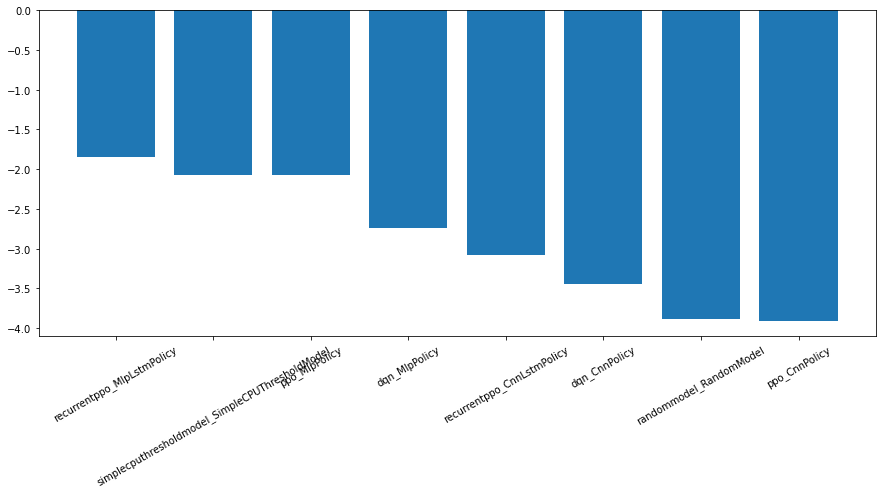

In [166]:
plt.figure(figsize=(15, 6))
plt.bar(x=[x for x in range(len(mean_rewards.index))], height=mean_rewards)
plt.xticks(range(len(mean_rewards.index)), mean_rewards.index, rotation=30)
plt.show()


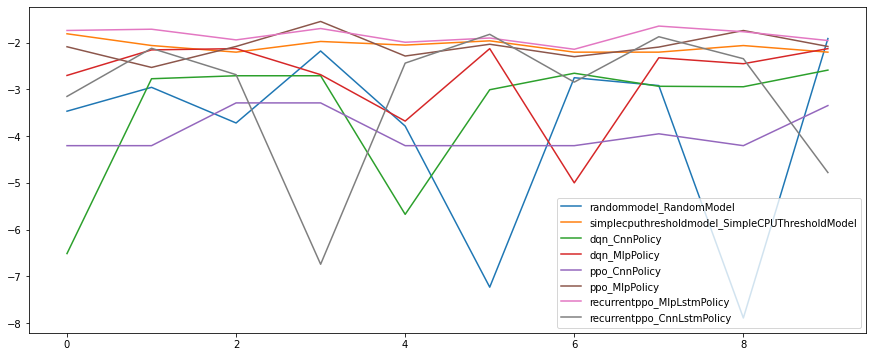

In [167]:
plt.figure(figsize=(15, 6))
plt.plot(rewards)
plt.legend(rewards.columns)
plt.show()

In [168]:
episode_lengths

,randommodel_RandomModel,simplecputhresholdmodel_SimpleCPUThresholdModel,dqn_CnnPolicy,dqn_MlpPolicy,ppo_CnnPolicy,ppo_MlpPolicy,recurrentppo_MlpLstmPolicy,recurrentppo_CnnLstmPolicy
0,67,50,134,75,139,98,50,66
1,36,53,74,73,139,110,50,36
2,43,50,74,73,127,98,50,46
3,30,50,74,104,127,76,41,77
4,82,50,146,104,139,104,50,75
5,110,50,74,73,139,104,50,34
6,51,50,74,146,139,104,73,49
7,46,50,74,73,140,98,50,28
8,68,50,74,73,139,76,50,37
9,37,50,74,73,128,99,50,89


In [169]:
mean_episode_lengths = episode_lengths.mean(axis=0).sort_values(ascending=False)
pd.DataFrame(mean_episode_lengths)

,0
ppo_CnnPolicy,135.6
ppo_MlpPolicy,96.7
dqn_CnnPolicy,87.2
dqn_MlpPolicy,86.7
randommodel_RandomModel,57.0
recurrentppo_CnnLstmPolicy,53.7
recurrentppo_MlpLstmPolicy,51.4
simplecputhresholdmodel_SimpleCPUThresholdModel,50.3


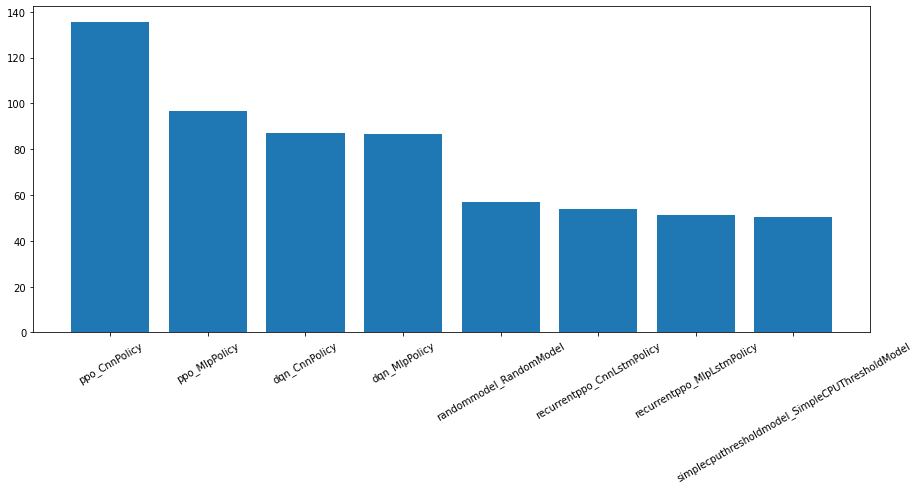

In [170]:
plt.figure(figsize=(15, 6))
plt.bar(x=[x for x in range(len(mean_episode_lengths.index))], height=mean_episode_lengths)
plt.xticks(range(len(mean_episode_lengths.index)), mean_episode_lengths.index, rotation=30)
plt.show()


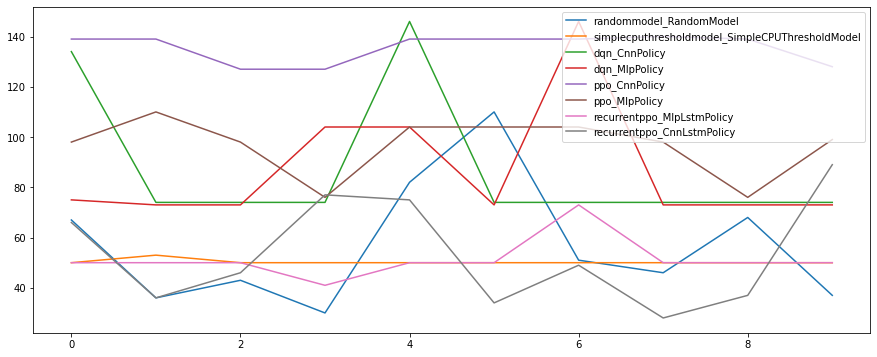

In [171]:
plt.figure(figsize=(15, 6))
plt.plot(episode_lengths)
plt.legend([col.replace('episode_lenghts_', '') for col in episode_lengths.columns])
plt.show()